In [1]:
import numpy as np
import matplotlib.pyplot as plt

###### Plot Zeugs

In [2]:
def new_plot(settings):
    if settings != None and settings != {}:
        

        if "figsize" in settings:
            figsize_multiplier = settings["figsize"]
        else:
            figsize_multiplier = 1

        if "axis" in settings and "subplots" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif "axis" in settings and not("subplots" in settings):
            fig, axs = plt.subplots( figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif not("axis" in settings) and "subplots" in settings and not("figsize" in settings):
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"])
        elif not("axis" in settings) and "subplots" in settings and "figsize" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=(figsize_multiplier,figsize_multiplier))    
        elif not("axis" in settings) and not("subplots" in settings) and "figsize" in settings:
            fig, axs = plt.subplots(figsize=(figsize_multiplier,figsize_multiplier))
        else:
            fig, axs = plt.subplots()
 
        if(np.size(axs) == 1):
            axs = [axs]

        for ax in axs:
        #Achsen Skala
            if "lock_axis" in settings and settings["lock_axis"] and "axis" in settings:
                ax.axis([settings["axis"]["x"][0],settings["axis"]["x"][1],settings["axis"]["y"][0],settings["axis"]["y"][1]])

            #Achsen Beschriftunge
            if "axis_label_steps" in settings and "axis" in settings:
                ax.set_xticks( np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["axis_label_steps"]["x"]))
                ax.set_yticks( np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["axis_label_steps"]["y"]))
            

            #Gitter
            if "grid" in settings:
                if "axis" in settings and "minor_steps" in settings["grid"]:
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["grid"]["minor_steps"]["x"]),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["grid"]["minor_steps"]["y"]),minor=True)

                elif "axis" in settings and not("minor_steps" in settings["grid"]):
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1),minor=True)
                    
                else:
                    ax.minorticks_on()

                ax.grid(which='minor', alpha=settings["grid"]["minor_alpha"])
                ax.grid(which='major', alpha=settings["grid"]["major_alpha"])

            #Achsen Verhältings
            if "aspect" in settings:
                ax.set_aspect(settings["aspect"])

        if(np.size(axs) == 1):
            axs = axs[0]

    else:
        fig, axs = plt.subplots()
    
    return fig, axs

In [3]:
def draw_plot(x,y,color,settings=None,subplot=(None,None)):

    if subplot == (None,None):
        fig, ax = new_plot(settings)
    else:
        fig, ax = subplot
 
    if np.size(ax) > 1:
        for i in range(0, np.size(ax)):
            ax[i].plot(x[i], y[i], color[i])
    else:
        ax.plot(x, y, color)
    
    return fig, ax

# Aufgabe 

#### plot_settings:

#### Euler

In [4]:
def euler(t0, t1, h, x0, funktion):
    t = np.arange(t0,t1+h,h)
    n = np.size(t)# Anzahl an t
    o = np.size(x0)# 
    x = np.zeros([o,n])# Array mit Nullen mit der selben Grösse wie t

    x[:,0] = x0
    for k in range(n-1):
        x[:, k+1] = x[:,k] + h * funktion(t[k],x[:,k])
    
    if o <= 1:
        x = x[0]

    return t, x

In [5]:
def ode(t, z):
    B = 1.0
    L0 = 0.5

    f = np.array([z[1],-100 * (z[1]*(z[0]**2) - B*z[1] + z[0] -L0) ])
    return f

x0 = 0.6
xp0 = 0.0

z0 = np.array([x0, xp0])

h = 0.001
t0, t1 = 0.0, 10.0

In [6]:
t, z = euler(t0, t1, h, z0, ode)

#### Plots

[Text(0.5, 0, '$t$'), Text(0, 0.5, '$x$')]

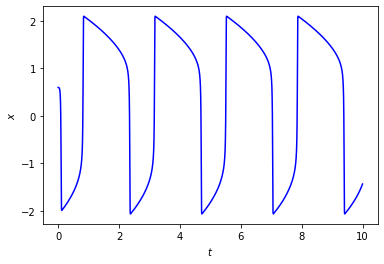

In [7]:
fig, ax = draw_plot(t, z[0], 'b')
ax.set(xlabel='$t$', ylabel='$x$')

[Text(0.5, 0, '$t$'), Text(0, 0.5, '$\\dot{x}$')]

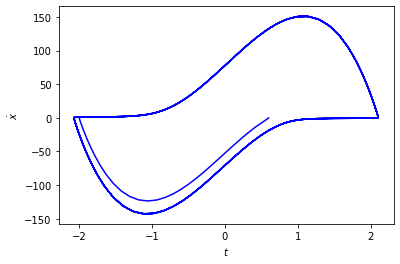

In [8]:
fig, ax = draw_plot(z[0], z[1], 'b')
ax.set(xlabel='$t$', ylabel='$\dot{x}$')